In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.special as special
import scipy.optimize as optimize
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pickle, json
import astropy.constants as c
import astropy.units as u
from mpmath import *
from sympy import *
import sympy
from sympy.solvers import solve
from sympy.plotting import plot

In [3]:
# symbolic calculation (for future reference)
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit())

Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

t0 = 1.4809609793861218
period = 8.885765876316732


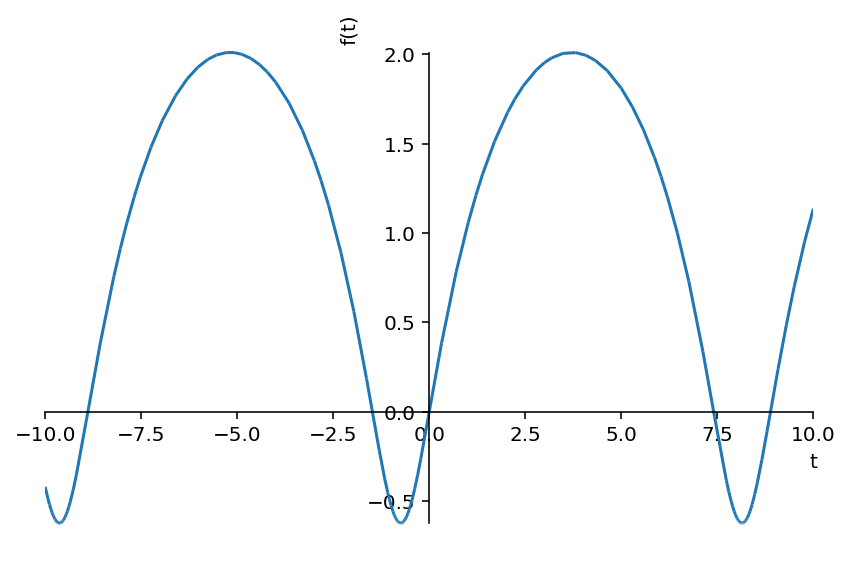

t0 = -0.7071067811865475
x0 = -0.6931471805599453


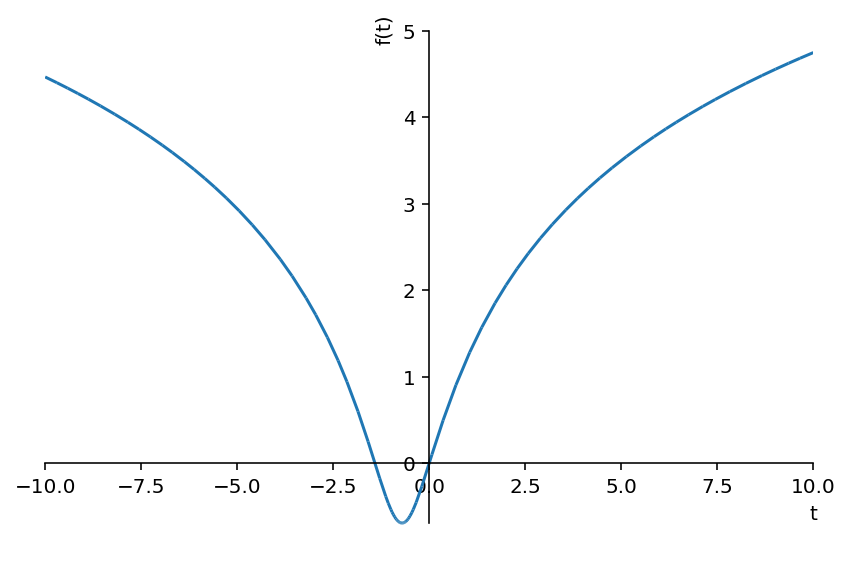

t0 = 0.5731079173902944


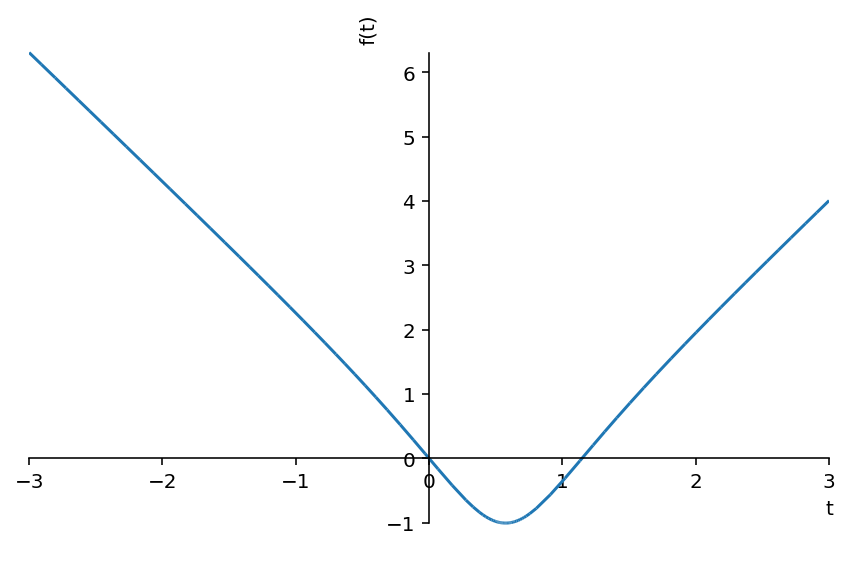

In [4]:
# problem 1a
x, t = symbols('x, t') 

# bound solution
E = -0.25
t0 = (1/np.sqrt(2*abs(E))) * np.arcsin(np.sqrt(1-abs(E)))
T = 2*np.pi/np.sqrt(2*abs(E))
print('t0 =', t0)
print('period =', T)

x = log( (1/abs(E)) * (1 + np.sqrt(1-abs(E)) * sin(np.sqrt(2*abs(E)) * (t-t0)) )  )
plot(x)

# critical solution
E = 0
t0 = -1/np.sqrt(2)
print('t0 =', t0)
x0 = -np.log(2)
print('x0 =', x0)
x = log( 1/2 + (t-t0)**2 )
plot(x)

# scattering solution
E = 2
t0 = (1/np.sqrt(2*E)) * np.arccosh(np.sqrt(1+E))
print('t0 =', t0)

x = log( (1/E) * (-1 + np.sqrt(1+E) * cosh(np.sqrt(2*E) * (t-t0)) )  )
plot(x, (t, -3, 3))

period = 8.885765876316732


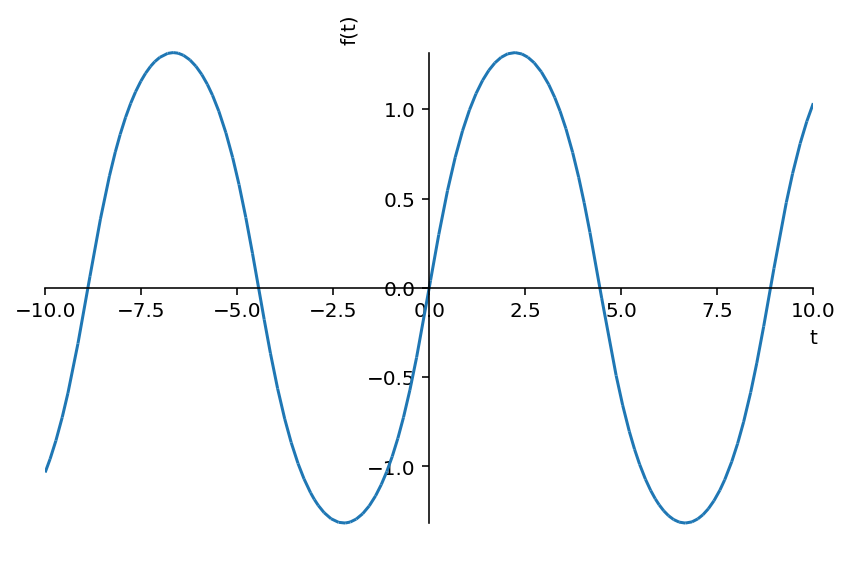

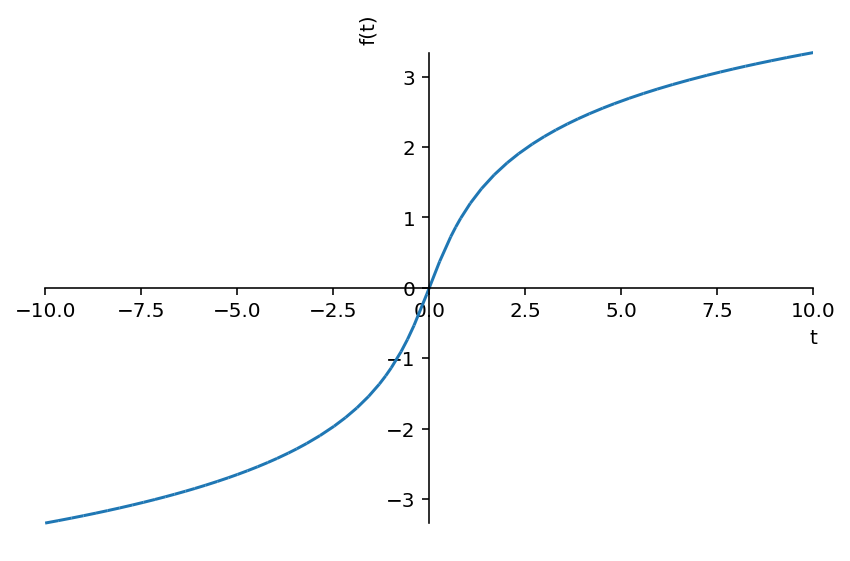

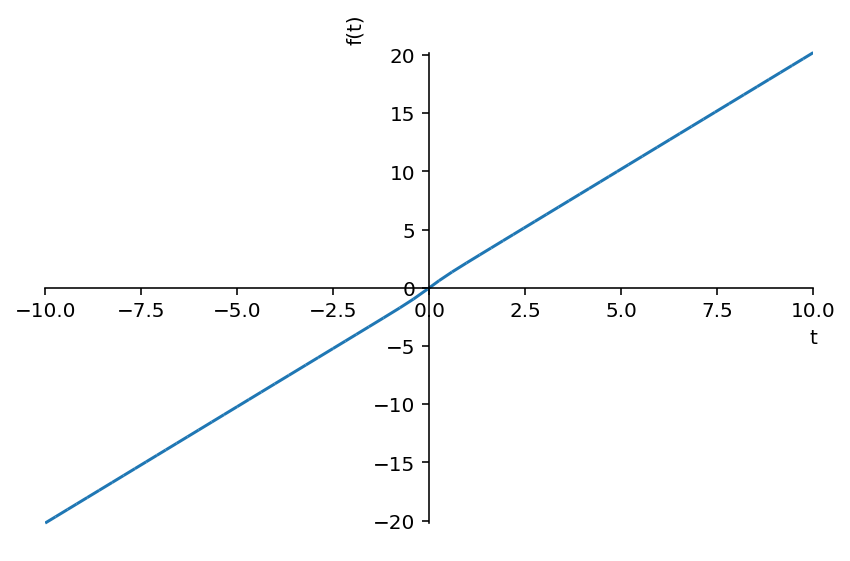

In [5]:
# problem 1.1(b)
x, t = symbols('x, t') 

# bound solution
E = -0.25
T = 2*np.pi/np.sqrt(2*abs(E))
print('period =', T)

x = asinh( np.sqrt(-1 + 1/abs(E)) * sin( np.sqrt(2*abs(E)) * t) )
plot(x)

# critical solution
E = 0
x = asinh( np.sqrt(2) * t )
plot(x)

# scattering solution
E = 2

x = asinh( np.sqrt(1 + 1/E) * sinh(np.sqrt(2*E) * t) )
plot(x)

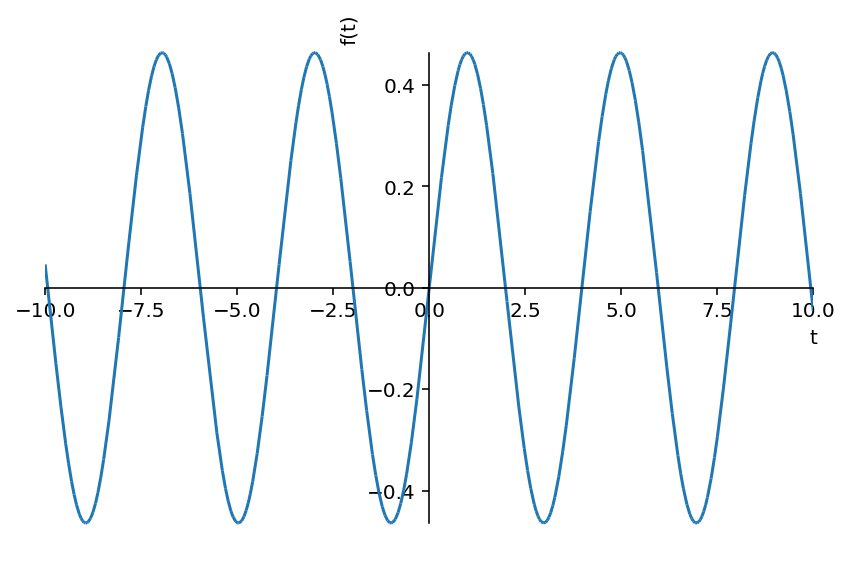

In [6]:
# problem 1.1(c)

# only bound solutions with E>0
x, t = symbols('x, t')
E = 0.25
U0 = 1

x = asin( np.sqrt(E/(E+U0)) * sin (np.sqrt(2*(E+U0)) * t) )
plot(x)

Text(0, 0.5, '$\\phi$')

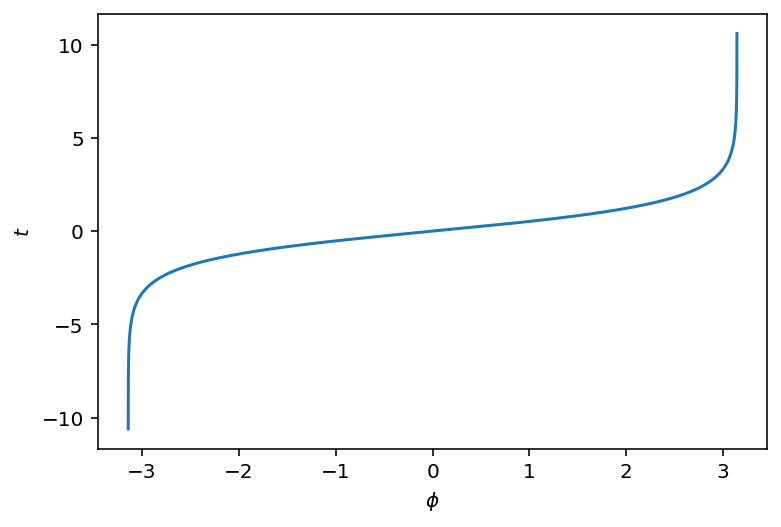

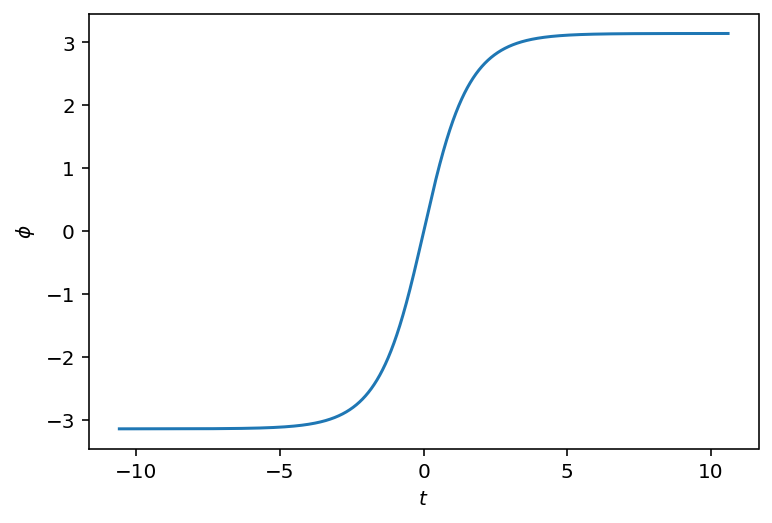

In [7]:
# problem 1.6
eps = 1e-4
phi = np.linspace(-np.pi+eps, np.pi-eps, 10000)

t = np.log(1./np.cos(phi/2) + np.tan(phi/2))

plt.figure()
plt.plot(phi, t)
plt.xlabel('$\phi$')
plt.ylabel('$t$')

plt.figure()
plt.plot(t, phi)
plt.xlabel('$t$')
plt.ylabel('$\phi$')

In [8]:
# period of pendulum (approx and exact expressions)

# constants
m = 1 # kg
g = 9.8 # m/s^2
ell = 1 # m

# definitions
U_m = 2*m*g*ell
E = (1 + 1e-6)*U_m
eps = E-U_m

# from prob 1.6, KS is kotkin & serbo answer (incorrect)
P_approx = (2*np.sqrt(ell/g))*np.log(2*np.pi/np.sqrt(2*eps/(m*g*ell))) 
P_KS = np.sqrt(ell/g)*np.log(0.5* (np.pi**2) * m*g*ell/eps) 
print(P_approx, P_KS)

# exact solution (agrees with P_approx not P_KS)
k = np.sqrt(U_m/E)
m = k**2 # scipy has K(m) where m=k^2
P_exact = 2*k*np.sqrt(ell/g)*special.ellipk(m)
print(P_exact)

5.144544061851168 4.7017085720956375
5.298872779063663


phi0 = 40.0  degrees
small angle  = 2.007089923154493 sec
1st order    = 2.0682293785216155 sec
exact period = 2.069993163286821  sec


Text(0.5, 1.0, 'phi_0 = 40.0 degrees')

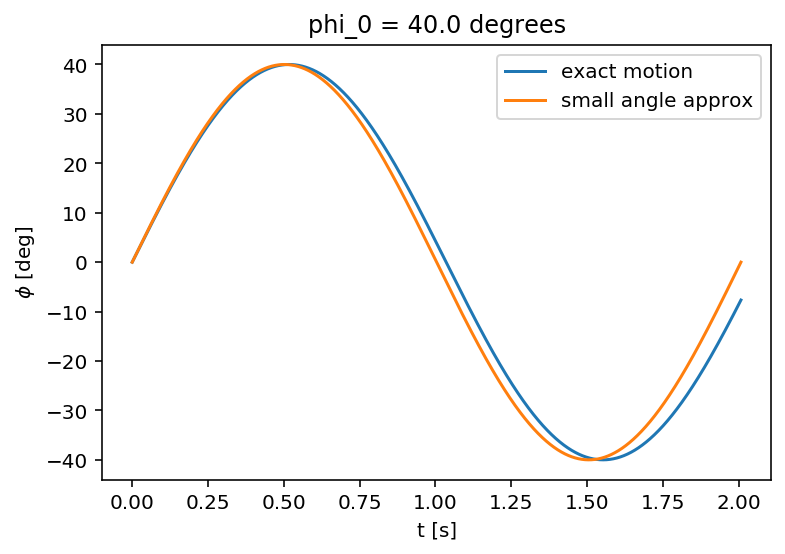

In [9]:
# problem 1.7

# choose maximum angle phi0 ( E = mgl(1-cos(phi0)))
phi0 = np.deg2rad(40)
print('phi0 =', np.rad2deg(phi0), ' degrees')

# constants
g = 9.8 # m/s^2
ell = 1 # m

# small angle approximation angular frequency and period
omega0 = np.sqrt(g/ell)
P0 = 2*np.pi/omega0

# discrete times
t = np.linspace(0, P0, 10000)

# time evolution for phi
x = omega0*t
k = np.sin(phi0/2)
m = k**2 # scipy has K(m) where m=k^2
sn_x, cn_x, dn_x, ph_x = special.ellipj(x, m)
phi = 2*np.arcsin(k*sn_x)

# actual period
P = (4/omega0)*special.ellipk(m)

# 1st order correction to the period
P1 = P0*(1 + phi0**2/16)

# display periods
print('small angle  =', P0, 'sec')
print('1st order    =', P1, 'sec')
print('exact period =', P, ' sec')

# make plots
plt.figure()
plt.plot(t, np.rad2deg(phi), t, np.rad2deg(phi0)*np.sin(omega0*t))
plt.xlabel('t [s]')
plt.ylabel('$\phi$ [deg]')
plt.legend(('exact motion', 'small angle approx'))
titlestr = 'phi_0 = ' + str(np.rad2deg(phi0)) + ' degrees'
plt.title(titlestr)


A1 = 1.2907729789694111 m/s
A2 = 0.8161463614068055 m/s
C1 = 0.5 m/s
t0 = 0.7747295739010803 sec; y0 = 0.38736478695054016 m


Text(0, 0.5, 'y')

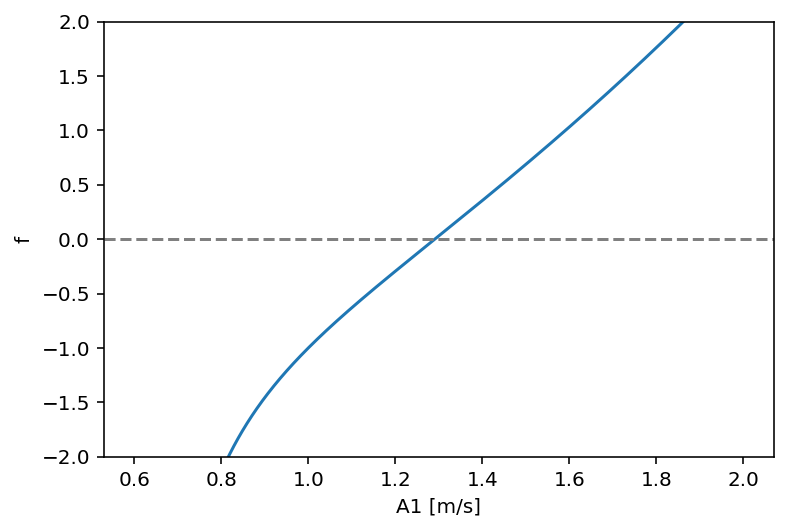

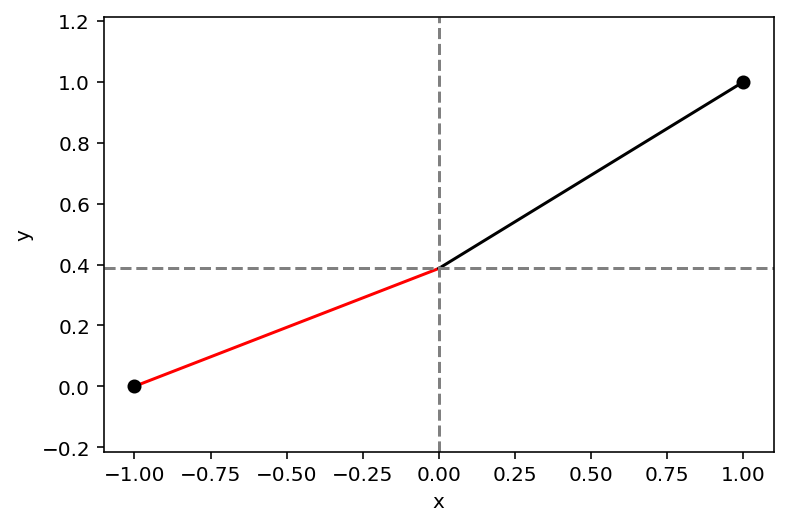

In [10]:
# problem 4.2

# constants
m = 1 # kg
V = 0.5 # J
tau = 2 # sec
a = 1 # m

# function to solve to determine A1
def f(A1, a, tau):
    y = (A1**2)*(1-a**2/(A1*tau-a)**2) - 2*V/m    

    return y

# plot function
x = np.linspace(0.6, 2, 1000)
y = f(x, a, tau)
plt.figure()
plt.plot(x, y)
plt.axhline(y=0, color = 'grey', linestyle='--')
plt.xlabel('A1 [m/s]')
plt.ylabel('f')
plt.ylim(-2,2)

# find root
A1 = optimize.newton(f, 1, args=(a, tau))
print('A1 =', A1, 'm/s')
#A1 = ((2*V/m)*(a/tau))**(1/3)
#print('A1^2 - 2V/m =', A1**2-2*V/m)

# remaining parameters
A2 = a*A1/(A1*tau-a)
A2 = np.sqrt(A1**2 - 2*V/m)
B1 = -a
B2 = a - A2*tau
C1 = a/tau
C2 = C1
D1 = 0
D2 = 0
t0 = a/A1
y0 = C1*t0
print('A2 =', A2, 'm/s')
print('C1 =', C1, 'm/s')
print('t0 =', t0, 'sec; y0 =', y0, 'm')

# functions of time
t1 = np.linspace(0, t0, 1000)
t2 = np.linspace(t0, tau, 1000)

x1 = A1*t1 + B1
y1 = C1*t1 + D1

x2 = A2*t2 + B2
y2 = C2*t2 + D2

plt.figure()
plt.plot(x1, y1, 'r', x2, y2, 'k')
plt.plot(-a, 0, 'ko')
plt.plot(a, a, 'ko')
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=y0, color='grey', linestyle='--')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

x0 = 3.665191429188092 theta0 = 3.665191429188092


3.625609908221908

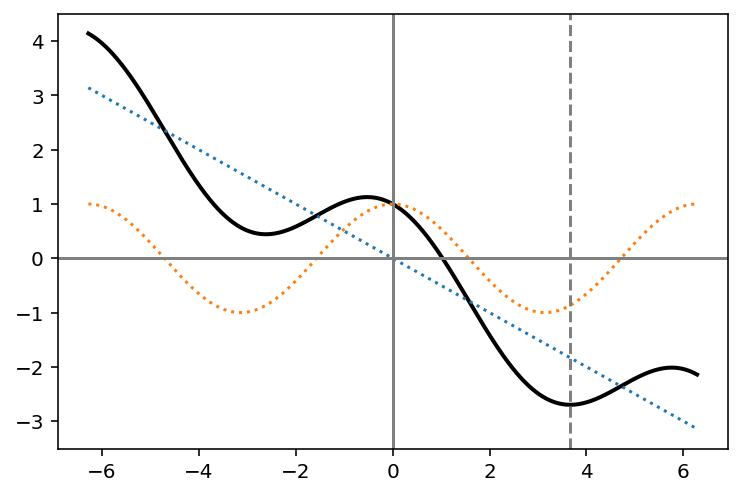

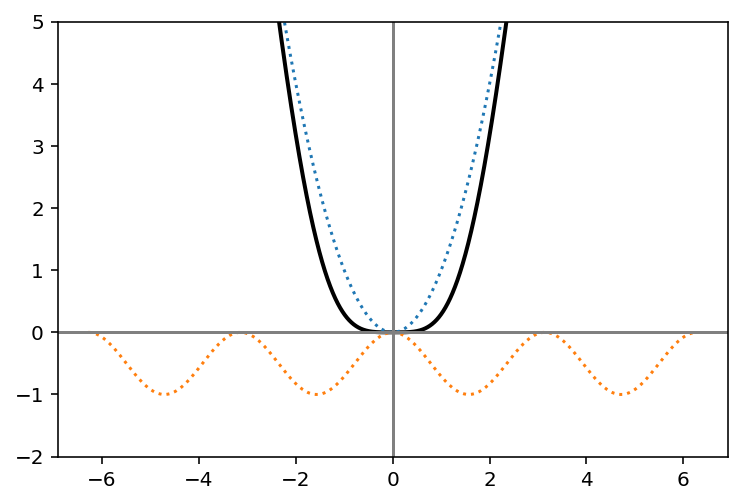

In [11]:
# problem 5.1

# part a)

# constants
V = 1
alpha = 1
F = 0.5

# potential
x = np.linspace(-2*np.pi, 2*np.pi, 10000)
U = V * np.cos(alpha*x) - F*x
dUdx = -alpha*V*np.sin(alpha*x) - F
ddUddx = -alpha**2 * V * np.cos(alpha*x)

# equilibrium position
x0 = -(1/alpha)*np.arcsin(F/(alpha*V))
theta0 = alpha*x0

# shift max to min
theta0 = np.pi-theta0
x0 = theta0/alpha

# plot and print out values
plt.figure()
plt.plot(x, U, color='k', linewidth=2)
plt.plot(x, -F*x, linestyle=':')
plt.plot(x, V*np.cos(alpha*x), linestyle=':')
plt.axvline(x0, color='grey', linestyle='--')
plt.axvline(x=0, color='grey', linestyle='-')
plt.axhline(y=0, color='grey', linestyle='-')
print('x0 =', x0, 'theta0 =', theta0)

# part b)
# constants
V = 1
alpha = 1

# potential
x = np.linspace(-2*np.pi, 2*np.pi, 10000)
U = V * ((alpha*x)**2 - np.sin(alpha*x)**2)

# plot and print out values
plt.figure()
plt.plot(x, U, color='k', linewidth=2)
plt.plot(x, V*(alpha*x)**2, linestyle=':')
plt.plot(x, -V*np.sin(alpha*x)**2, linestyle=':')
plt.axvline(x=0, color='grey', linestyle='-')
plt.axhline(y=0, color='grey', linestyle='-')
plt.ylim((-2,5))
special.gamma(0.25)